### What is Fraud?

Accourding to Oxford, Fraud a person or thing intended to deceive others, typically by unjustifiably claiming or being credited with accomplishments or qualities.

##### Now let's define Fraud Detection...
Fraud detection is a set of activities undertaken to prevent money or property from being obtained through false pretenses. Fraud detection is applied to many industries such as banking or insurance. In banking, fraud may include forging checks or using stolen credit cards. Other forms of fraud may involve exaggerating losses or causing an accident with the sole intent for the payout. *- Margaret Rouse, seachsecurity.techtarget.com*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#jupyter intelisense
%config IPCompleter.greedy=True

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### In this CAPSTONE, 
We will look into the probability of an activity being fraudulent

In [2]:
train_identity_df = pd.read_csv('downloads/fraud-detection/train_identity.csv')
train_transaction_df = pd.read_csv('downloads/fraud-detection/train_transaction.csv')

First will will examine the data that we have. We will first start with the identity dataset.

In [3]:
train_identity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
TransactionID    144233 non-null int64
id_01            144233 non-null float64
id_02            140872 non-null float64
id_03            66324 non-null float64
id_04            66324 non-null float64
id_05            136865 non-null float64
id_06            136865 non-null float64
id_07            5155 non-null float64
id_08            5155 non-null float64
id_09            74926 non-null float64
id_10            74926 non-null float64
id_11            140978 non-null float64
id_12            144233 non-null object
id_13            127320 non-null float64
id_14            80044 non-null float64
id_15            140985 non-null object
id_16            129340 non-null object
id_17            139369 non-null float64
id_18            45113 non-null float64
id_19            139318 non-null float64
id_20            139261 non-null float64
id_21            5159 non-null float64
id_2

We have Transaction ID and the device information.

In [4]:
train_identity_df.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [5]:
train_identity_df.isnull().sum()*100/train_identity_df.isnull().count()

TransactionID     0.000000
id_01             0.000000
id_02             2.330257
id_03            54.016071
id_04            54.016071
id_05             5.108401
id_06             5.108401
id_07            96.425922
id_08            96.425922
id_09            48.052110
id_10            48.052110
id_11             2.256765
id_12             0.000000
id_13            11.726165
id_14            44.503685
id_15             2.251912
id_16            10.325654
id_17             3.372321
id_18            68.722137
id_19             3.407681
id_20             3.447200
id_21            96.423149
id_22            96.416215
id_23            96.416215
id_24            96.708798
id_25            96.441868
id_26            96.420375
id_27            96.416215
id_28             2.256765
id_29             2.256765
id_30            46.222432
id_31             2.739318
id_32            46.207872
id_33            49.187079
id_34            46.056034
id_35             2.251912
id_36             2.251912
i

We have a lot of missing data in the ID field and we will drop them for they don't provide additional information

In [6]:
train_identity_df_clean = train_identity_df.drop(columns=['id_03','id_04','id_07','id_08','id_09','id_10',
                                                         'id_13','id_14','id_16','id_18','id_21','id_22','id_23',
                                                         'id_24','id_25','id_26','id_27','id_30','id_32','id_33',
                                                         'id_34'])

In [7]:
train_identity_df_clean.isnull().sum()*100/train_identity_df_clean.isnull().count()

TransactionID     0.000000
id_01             0.000000
id_02             2.330257
id_05             5.108401
id_06             5.108401
id_11             2.256765
id_12             0.000000
id_15             2.251912
id_17             3.372321
id_19             3.407681
id_20             3.447200
id_28             2.256765
id_29             2.256765
id_31             2.739318
id_35             2.251912
id_36             2.251912
id_37             2.251912
id_38             2.251912
DeviceType        2.373243
DeviceInfo       17.726179
dtype: float64

Let us check our next dataset, Transcation.

In [8]:
train_transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [9]:
train_transaction_df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,238269.000000,37627.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,589271.000000,309743.000000,327662.000000,421618.000000,280699.000000,73187.000000,38917.000000,74926.000000,74926.000000,514518.000000,311253.000000,64717.000000,61952.000000,62187.000000,501427.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,421571.000000,421571.000000,421571.000000,421571.00000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,590226.000000,590226.00000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.00

In [10]:
train_transaction_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

This data shows our transaction information and if the item is fraud or not.

In [11]:
train_transaction_df_clean = train_transaction_df[['TransactionID','isFraud','TransactionDT','TransactionAmt',
                                                  'card1','card2','card3','card5']].copy()

In [12]:
train_transaction_df_clean.isnull().sum()*100/train_transaction_df_clean.isnull().count()

TransactionID     0.000000
isFraud           0.000000
TransactionDT     0.000000
TransactionAmt    0.000000
card1             0.000000
card2             1.512683
card3             0.265012
card5             0.721204
dtype: float64

I want to know what is the percentage count, do you have more data that is fraud or not?

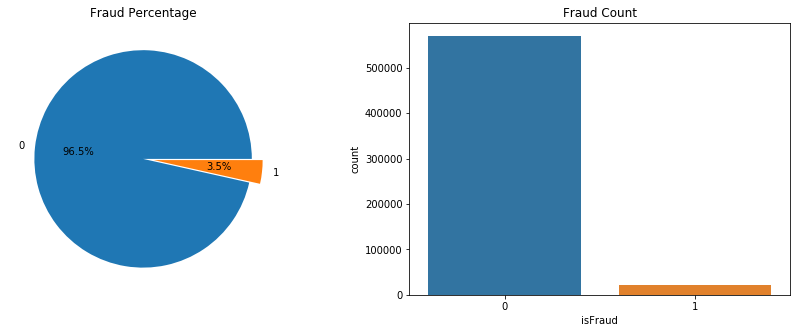

In [13]:
f,ax=plt.subplots(1,2,figsize=(15,5))
train_transaction_df_clean['isFraud'].value_counts().plot.pie(explode=[0,0.1],
                                               autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Fraud Percentage')
ax[0].set_ylabel('')
sns.countplot('isFraud',data=train_transaction_df_clean,ax=ax[1])
ax[1].set_title('Fraud Count')
plt.show()

Both our pie chart and bar graph shows that the data we have are mainly non-fraud data. 

Let us know combine both information as we continue in discovering data.

In [14]:
train_df = pd.merge(train_identity_df_clean,train_transaction_df_clean, on='TransactionID', how='left')

After the merge now we can check the device information from our identity dataset and see if they're fraud or not.

In [15]:
train_df.head()

,TransactionID,id_01,id_02,id_05,id_06,id_11,id_12,id_15,id_17,id_19,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5
0,2987004,0.0,70787.0,NaN,NaN,100.0,NotFound,New,166.0,542.0,144.0,New,NotFound,samsung browser 6.2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,0,86506,50.000,4497,514.0,150.0,102.0
1,2987008,-5.0,98945.0,0.0,-5.0,100.0,NotFound,New,166.0,621.0,500.0,New,NotFound,mobile safari 11.0,T,F,F,T,mobile,iOS Device,0,86535,15.000,2803,100.0,150.0,226.0
2,2987010,-5.0,191631.0,0.0,0.0,100.0,NotFound,Found,121.0,410.0,142.0,Found,Found,chrome 62.0,F,F,T,T,desktop,Windows,0,86549,75.887,16496,352.0,117.0,134.0
3,2987011,-5.0,221832.0,0.0,-6.0,100.0,NotFound,New,225.0,176.0,507.0,New,NotFound,chrome 62.0,F,F,T,T,desktop,NaN,0,86555,16.495,4461,375.0,185.0,224.0
4,2987016,0.0,7460.0,1.0,0.0,100.0,NotFound,Found,166.0,529.0,575.0,Found,Found,chrome 62.0,T,F,T,T,desktop,MacOS,0,86620,30.000,1790,555.0,150.0,226.0


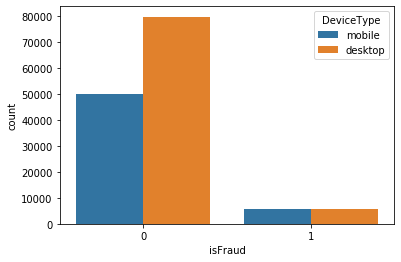

In [16]:
sns.countplot('isFraud',hue='DeviceType',data=train_df)
plt.show()

We have almost equal amount of fraudulent data coming from the mobile and desktop side. Criminals do not have a preferred method in commiting a crime.

We will now check the correlation between all the data the we have.

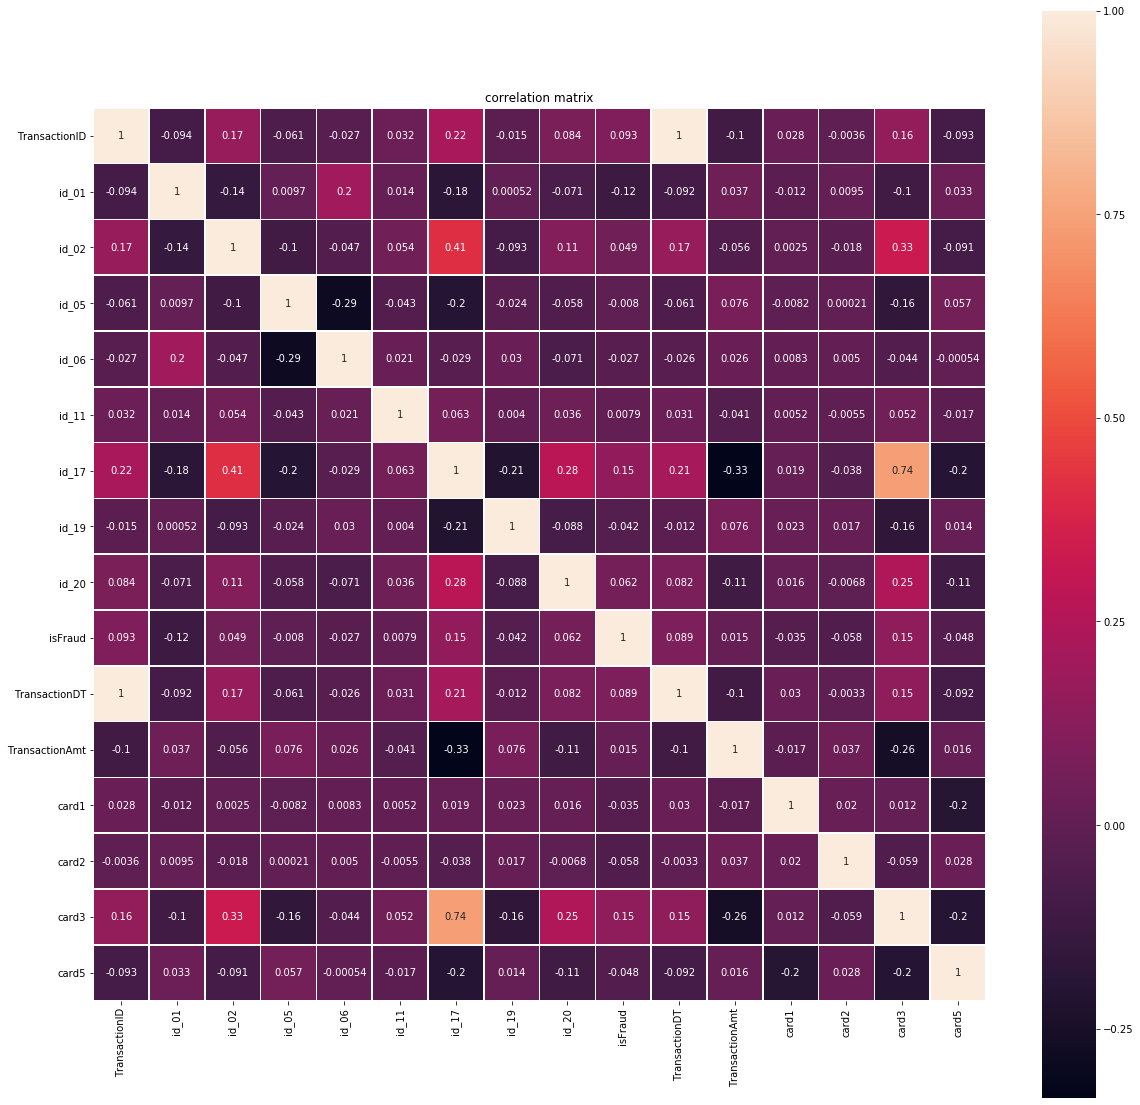

In [17]:
# make the correlation matrices.
train_cmat = train_df.corr()

plt.figure(figsize=(20,20))

# draw the heatmap using seaborn.
sns.heatmap(train_cmat, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix")
plt.show()

And we need to check of any outliers

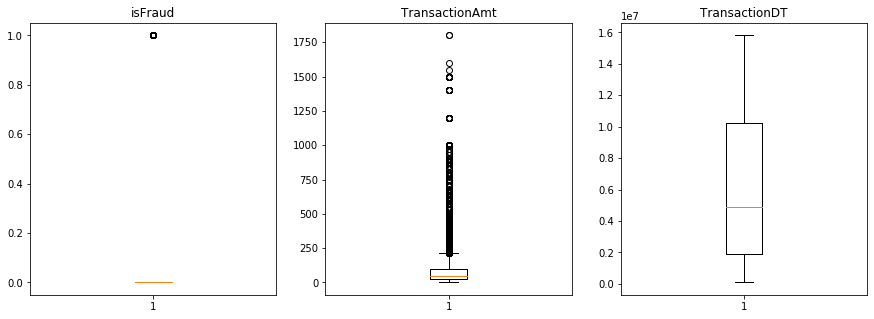

In [18]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1) 
plt.boxplot(train_df["isFraud"]) 
plt.title("isFraud")

plt.subplot(1,3,2)
plt.boxplot(train_df["TransactionAmt"])
plt.title("TransactionAmt")

plt.subplot(1,3,3)
plt.boxplot(train_df["TransactionDT"])
plt.title("TransactionDT")

plt.show()

In [19]:
from scipy.stats.mstats import winsorize

train_df["wTransactionAmt"] = winsorized_views = winsorize(train_df["TransactionAmt"], (0, 0.15))


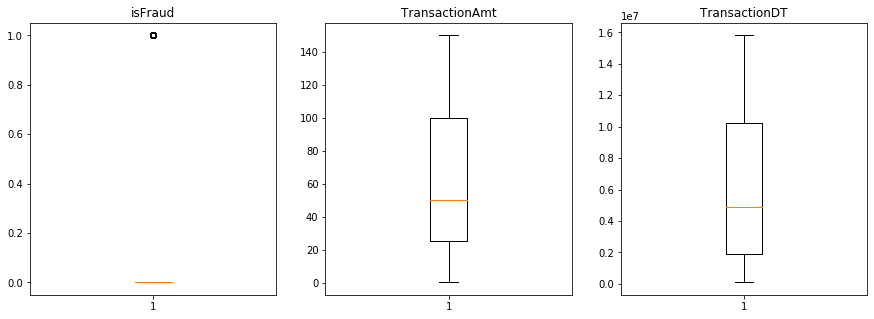

In [20]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1) 
plt.boxplot(train_df["isFraud"]) 
plt.title("isFraud")

plt.subplot(1,3,2)
plt.boxplot(train_df["wTransactionAmt"])
plt.title("TransactionAmt")

plt.subplot(1,3,3)
plt.boxplot(train_df["TransactionDT"])
plt.title("TransactionDT")

plt.show()

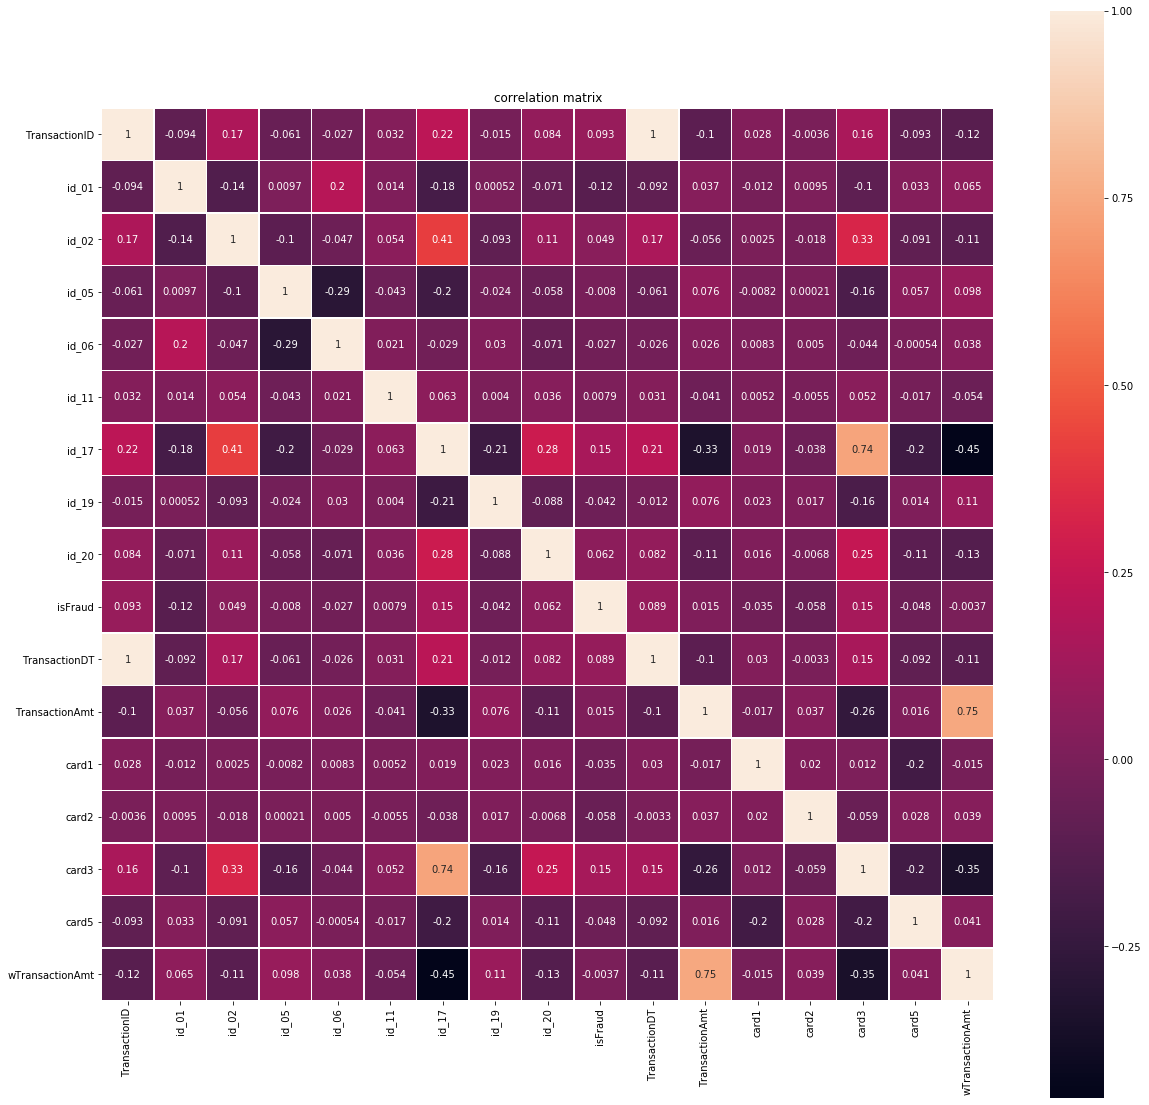

In [21]:
# make the correlation matrices.
train_cmat = train_df.corr()

plt.figure(figsize=(20,20))

# draw the heatmap using seaborn.
sns.heatmap(train_cmat, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix")
plt.show()

### Feature Engineering

Let's add more data by using decive type and the browser information saved in 'id_31'.
First let's expand Device Type

In [22]:
def func(row):
    if row['DeviceType'] == 'mobile':
        return 1
    elif row['DeviceType'] =='desktop':
        return 2 
    else:
        return 3

train_df['combo'] = train_df.apply(func, axis=1)

In [23]:
train_df.head(10)

,TransactionID,id_01,id_02,id_05,id_06,id_11,id_12,id_15,id_17,id_19,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,wTransactionAmt,combo
0,2987004,0.0,70787.0,NaN,NaN,100.0,NotFound,New,166.0,542.0,144.0,New,NotFound,samsung browser 6.2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,0,86506,50.000,4497,514.0,150.0,102.0,50.000,1
1,2987008,-5.0,98945.0,0.0,-5.0,100.0,NotFound,New,166.0,621.0,500.0,New,NotFound,mobile safari 11.0,T,F,F,T,mobile,iOS Device,0,86535,15.000,2803,100.0,150.0,226.0,15.000,1
2,2987010,-5.0,191631.0,0.0,0.0,100.0,NotFound,Found,121.0,410.0,142.0,Found,Found,chrome 62.0,F,F,T,T,desktop,Windows,0,86549,75.887,16496,352.0,117.0,134.0,75.887,2
3,2987011,-5.0,221832.0,0.0,-6.0,100.0,NotFound,New,225.0,176.0,507.0,New,NotFound,chrome 62.0,F,F,T,T,desktop,NaN,0,86555,16.495,4461,375.0,185.0,224.0,16.495,2
4,2987016,0.0,7460.0,1.0,0.0,100.0,NotFound,Found,166.0,529.0,575.0,Found,Found,chrome 62.0,T,F,T,T,desktop,MacOS,0,86620,30.000,1790,555.0,150.0,226.0,30.000,2
5,2987017,-5.0,61141.0,3.0,0.0,100.0,NotFound,Found,166.0,529.0,600.0,Found,Found,chrome 62.0,T,F,T,T,desktop,Windows,0,86668,100.000,11492,111.0,150.0,219.0,100.000,2
6,2987022,-15.0,NaN,NaN,NaN,NaN,NotFound,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,86786,50.000,1724,583.0,150.0,226.0,50.000,3
7,2987038,0.0,31964.0,0.0,-10.0,100.0,Found,Found,166.0,352.0,533.0,Found,Found,chrome 62.0,T,F,T,T,mobile,NaN,0,87172,25.000,5463,399.0,150.0,137.0,25.000,1
8,2987040,-10.0,116098.0,0.0,0.0,100.0,NotFound,Found,121.0,410.0,142.0,Found,Found,chrome 62.0,F,F,T,T,desktop,Windows,0,87209,75.887,13329,569.0,117.0,226.0,75.887,2
9,2987048,-5.0,257037.0,0.0,0.0,100.0,NotFound,New,225.0,484.0,507.0,New,NotFound,chrome 62.0,F,F,T,T,desktop,Windows,0,87317,42.294,15885,545.0,185.0,138.0,42.294,2


Then, we'll review what different browsers used and placed them in a new column.

In [24]:
train_df.id_31.unique()

array(['samsung browser 6.2', 'mobile safari 11.0', 'chrome 62.0', nan,
       'chrome 62.0 for android', 'edge 15.0', 'mobile safari generic',
       'chrome 49.0', 'chrome 61.0', 'edge 16.0', 'safari generic',
       'edge 14.0', 'chrome 56.0 for android', 'firefox 57.0',
       'chrome 54.0 for android', 'mobile safari uiwebview', 'chrome',
       'chrome 62.0 for ios', 'firefox', 'chrome 60.0 for android',
       'mobile safari 10.0', 'chrome 61.0 for android',
       'ie 11.0 for desktop', 'ie 11.0 for tablet', 'mobile safari 9.0',
       'chrome generic', 'other', 'chrome 59.0 for android',
       'firefox 56.0', 'android webview 4.0', 'chrome 55.0', 'opera 49.0',
       'ie', 'chrome 55.0 for android', 'firefox 52.0',
       'chrome 57.0 for android', 'chrome 56.0',
       'chrome 46.0 for android', 'chrome 58.0', 'firefox 48.0',
       'chrome 59.0', 'samsung browser 4.0', 'edge 13.0',
       'chrome 53.0 for android', 'chrome 58.0 for android',
       'chrome 60.0', 'mobile sa

In [25]:
def func(row):
    try:
        if 'android' in row['id_31']:
            return 1
        elif 'chrome' in row['id_31']:
            return 2 
        elif 'edge' in row['id_31']:
            return 3 
        elif 'firefox' in row['id_31']:
            return 4 
        elif 'opera' in row['id_31']:
            return 5 
        elif 'safari' in row['id_31']:
            return 6 
        elif 'samsung' in row['id_31']:
            return 7 
        else:
            return 8
    except:
        return 8
        
train_df['browser'] = train_df.apply(func, axis=1)

In [26]:
train_df.head()

,TransactionID,id_01,id_02,id_05,id_06,id_11,id_12,id_15,id_17,id_19,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,wTransactionAmt,combo,browser
0,2987004,0.0,70787.0,NaN,NaN,100.0,NotFound,New,166.0,542.0,144.0,New,NotFound,samsung browser 6.2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,0,86506,50.000,4497,514.0,150.0,102.0,50.000,1,7
1,2987008,-5.0,98945.0,0.0,-5.0,100.0,NotFound,New,166.0,621.0,500.0,New,NotFound,mobile safari 11.0,T,F,F,T,mobile,iOS Device,0,86535,15.000,2803,100.0,150.0,226.0,15.000,1,6
2,2987010,-5.0,191631.0,0.0,0.0,100.0,NotFound,Found,121.0,410.0,142.0,Found,Found,chrome 62.0,F,F,T,T,desktop,Windows,0,86549,75.887,16496,352.0,117.0,134.0,75.887,2,2
3,2987011,-5.0,221832.0,0.0,-6.0,100.0,NotFound,New,225.0,176.0,507.0,New,NotFound,chrome 62.0,F,F,T,T,desktop,NaN,0,86555,16.495,4461,375.0,185.0,224.0,16.495,2,2
4,2987016,0.0,7460.0,1.0,0.0,100.0,NotFound,Found,166.0,529.0,575.0,Found,Found,chrome 62.0,T,F,T,T,desktop,MacOS,0,86620,30.000,1790,555.0,150.0,226.0,30.000,2,2


In [27]:
df = train_df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144233 entries, 0 to 144232
Data columns (total 30 columns):
TransactionID      144233 non-null int64
id_01              144233 non-null float64
id_02              140872 non-null float64
id_05              136865 non-null float64
id_06              136865 non-null float64
id_11              140978 non-null float64
id_12              144233 non-null object
id_15              140985 non-null object
id_17              139369 non-null float64
id_19              139318 non-null float64
id_20              139261 non-null float64
id_28              140978 non-null object
id_29              140978 non-null object
id_31              140282 non-null object
id_35              140985 non-null object
id_36              140985 non-null object
id_37              140985 non-null object
id_38              140985 non-null object
DeviceType         140810 non-null object
DeviceInfo         118666 non-null object
isFraud            144233 non-null int64
T

In [28]:
df_list = ['id_02','id_05','id_06','id_11','id_17','id_19','id_20','card2','card3','card5']

for item in df_list:
    df[item].fillna(df[item].mean(), inplace=True)

In [29]:
df.isnull().sum()*100/df.isnull().count()

TransactionID       0.000000
id_01               0.000000
id_02               0.000000
id_05               0.000000
id_06               0.000000
id_11               0.000000
id_12               0.000000
id_15               2.251912
id_17               0.000000
id_19               0.000000
id_20               0.000000
id_28               2.256765
id_29               2.256765
id_31               2.739318
id_35               2.251912
id_36               2.251912
id_37               2.251912
id_38               2.251912
DeviceType          2.373243
DeviceInfo         17.726179
isFraud             0.000000
TransactionDT       0.000000
TransactionAmt      0.000000
card1               0.000000
card2               0.000000
card3               0.000000
card5               0.000000
wTransactionAmt     0.000000
combo               0.000000
browser             0.000000
dtype: float64

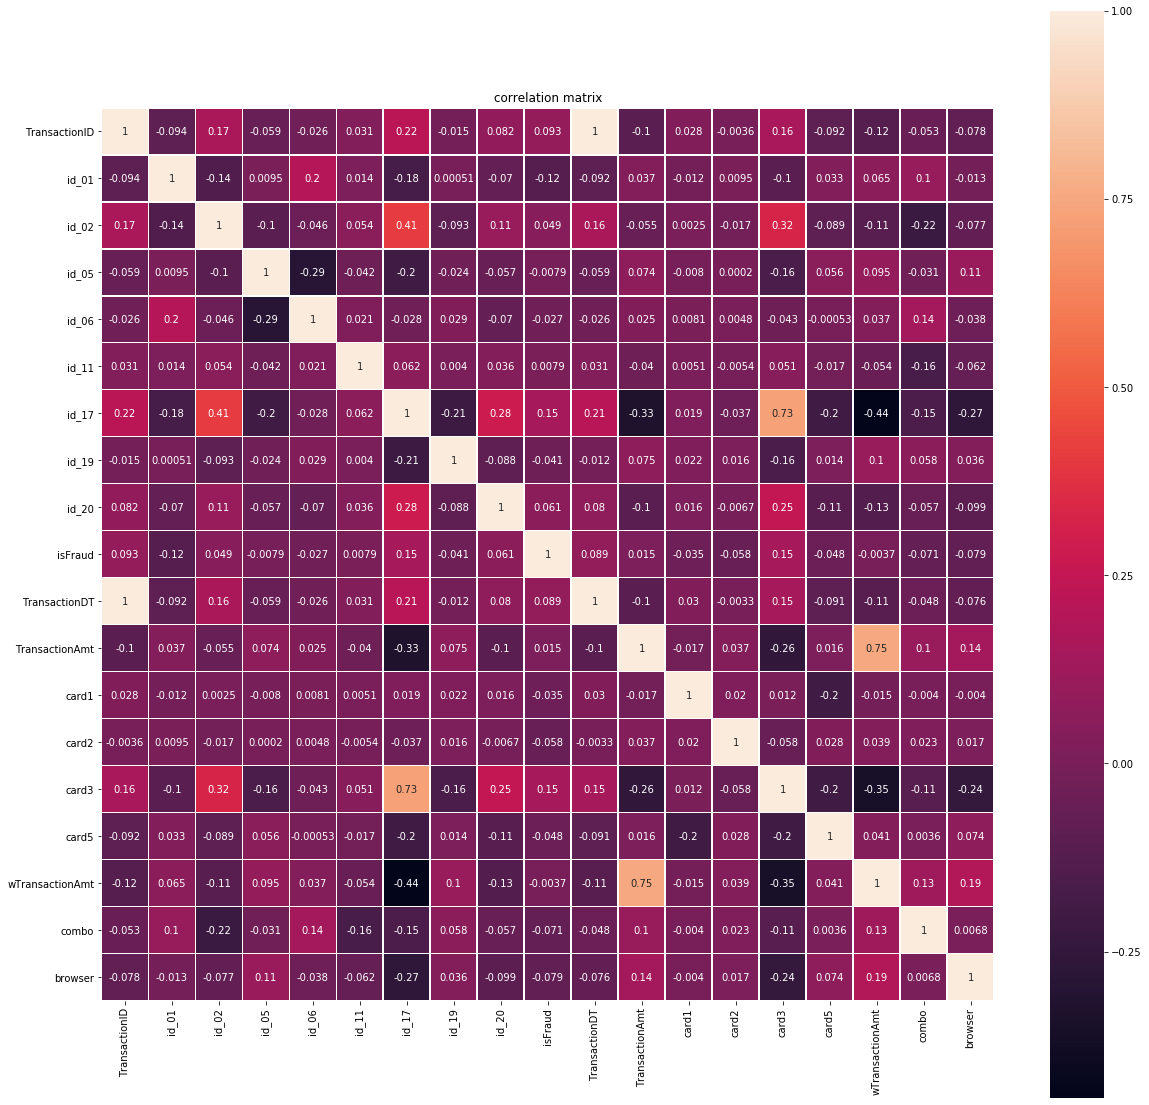

In [30]:
# make the correlation matrices.
df_cmat = df.corr()

plt.figure(figsize=(20,20))

# draw the heatmap using seaborn.
sns.heatmap(df_cmat, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix")
plt.show()

Most of the data is categorical. It doesn't make sense to use PCA.

Feature ranking:
1. feature 1 (0.095737)
2. feature 2 (0.094589)
3. feature 0 (0.086024)
4. feature 12 (0.079891)
5. feature 11 (0.074424)
6. feature 6 (0.073847)
7. feature 13 (0.071582)
8. feature 14 (0.070736)
9. feature 5 (0.070485)
10. feature 8 (0.054835)
11. feature 16 (0.053395)
12. feature 7 (0.052953)
13. feature 4 (0.041666)
14. feature 15 (0.026951)
15. feature 10 (0.024119)
16. feature 3 (0.018031)
17. feature 9 (0.010736)


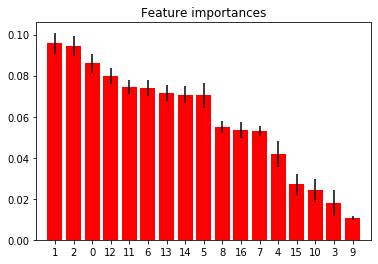

In [31]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Y is the target variable
y = df['isFraud']
# X is the feature set
X = df[['wTransactionAmt','TransactionDT','TransactionID','combo','browser',
             'id_01','id_02','id_05','id_06','id_11','id_17','id_19','id_20',
             'card1','card2','card3','card5']]

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()

plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### Training

We will use IsFraud as our traget data and transaction amount, transaction date, and the two new columns, combo and browser as our featured variable.

In [32]:
import statsmodels.api as sm

# Y is the target variable
y = train_df['isFraud']
# X is the feature set
X = train_df[['wTransactionAmt','TransactionDT','card3','TransactionID']]

In [33]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    
    plt.legend(loc='upper right')
    plt.figure(figsize=(30,30))
    plt.show()

*During this exercise the next step was discovered after running different models. The data has an overfitting issue that we need to address before moving forward with the different models.*

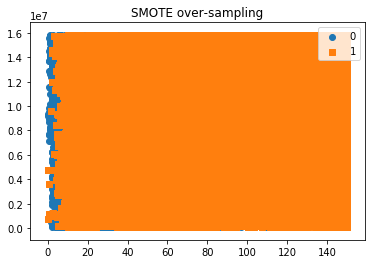

<Figure size 2160x2160 with 0 Axes>

In [34]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

I've tried different techniques in solving overfitting. I've also tried PCA, Random Over Sampler and Random Under Sampler. 

#### Let's split the data and run it under the different models

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 212664
The number of observations in test set is 53166


### Model 1: Logistic Regression
Since we have a yes and no type target, Let's try the logistic model first.

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model = LogisticRegression()

model.fit(X_train, y_train)

model.score(X_train, y_train)

0.5666121205281571

The score is not ideal so we need to try another model

### Model 2: Decision Tree

In [37]:
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=9,
    random_state = 1337
)

decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1337, splitter='best')

In [38]:
print(decision_tree.score(X_test, y_test))
print(decision_tree.score(X_train, y_train))

0.7704924199676485
0.7723780235488846


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(3, 10)}

tree = GridSearchCV(DecisionTreeClassifier(), param_grid)

tree.fit(X_train, y_train)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train

In [40]:
tree.best_params_

{'max_depth': 9}

In [41]:
from sklearn.metrics import classification_report

y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.68      0.75     26615
           1       0.73      0.86      0.79     26551

    accuracy                           0.77     53166
   macro avg       0.78      0.77      0.77     53166
weighted avg       0.78      0.77      0.77     53166



Even with the best parameters used, the model's score is not ideal for this dataset.

### Model 3: Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=20,n_estimators=15)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
print(clf.score(X_test, y_test))
print(clf.score(X_train, y_train))

0.9129518865440319
0.9513316781401647


In [44]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[10,15,20], 'n_estimators':[5, 10,15]}
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc, parameters,cv=3)
grid.fit(X_train, y_train)

grid.best_params_
#grid.cv_results_

{'max_depth': 20, 'n_estimators': 15}

In [45]:
## CHANGE INFO
from sklearn.metrics import classification_report

y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.68      0.75     26615
           1       0.73      0.86      0.79     26551

    accuracy                           0.77     53166
   macro avg       0.78      0.77      0.77     53166
weighted avg       0.78      0.77      0.77     53166



### Feature Selection

Feature ranking:
1. feature 1 (0.286077)
2. feature 3 (0.285307)
3. feature 0 (0.218002)
4. feature 2 (0.210614)


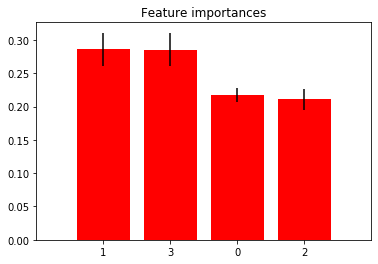

In [46]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier


forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_train, y_train)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

### How you chose your model specification and what alternatives you compared it to?

My target variable has two possible answers is either a "1", (yes, fraud) or "0", (no, not fraud). The first one thing that comes to mind is to use the **Logistical Regression model**. 

After doing some test, there is a problem of overfitting that I had to address first before working through the rest of the models. After using the **SMOTE** technique, the first model's score is not the best so I tried another model called **Decision Tree**. Even after looking for the best parameter for the data, the model doesn't look right. I switch to **Ramdom Forest** which yeld the best results in all models.

### The practical uses of your model for an audience of interest

This would help users that are in the banking and loan industry assest when a transaction is fraudulent. 

### Any weak points or shortcomings of your model

With Random Forest, it works with our data for we have small number of samples and it produced good results. However, as we change the paramenters it would reach to a point that the accuracy of our data would be affected. 

### In Summary

We have a data that had few samples that we have to enhance using different overfitting techniques before we could enhance and train. We've used different model based and based from all the testing, Random Forest Model works best with the information that we have. 

Next steps, I would like to venture on the other data that is provided in the dataset to further test the theory what are the different feature that would cause a transaction to be fraudelous. Also, I want to look into the speed on how long each line takes and look for more effective ways in handling similar type situations.